# WEEK 2 NOTEBOOK: Water Potability Data Cleaning

## 1. Introduction

This project focuses on cleaning the Water Potability dataset, which contains laboratory
measurements used to determine whether water is safe for human consumption.

The dataset includes the following features:

- pH
- Hardness
- Solids
- Chloramines
- Sulfate
- Conductivity
- Organic Carbon
- Trihalomethanes
- Turbidity
- Potability (0 = unsafe, 1 = safe)

The goal is to perform a complete data-cleaning pipeline to prepare the dataset for
exploration and modeling.

In [104]:
import os

if not os.path.exists("images"):
    os.makedirs("images")

In [42]:
## 2. Load the Raw Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("water_potability.csv")
df.head()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [25]:
import shutil
shutil.copy("water_potability.csv", "water_potability_raw.csv")


'water_potability_raw.csv'

In [43]:
## 3. Initial Inspection
df.info()
df.describe(include= "all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [44]:
df.shape

(3276, 10)

In [45]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [46]:
df.duplicated().sum()

0

In [47]:
## 4. Cleaning Steps
### 4.1 Fix column names
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [53]:
#4.2 Handle missing values

#Check missingness:

df.isna().sum().sort_values(ascending=False)

sulfate            781
ph                 491
trihalomethanes    162
hardness             0
solids               0
chloramines          0
conductivity         0
organic_carbon       0
turbidity            0
potability           0
dtype: int64

In [49]:
df["ph"].unique()[:20]
df["ph"].dtype

dtype('float64')

In [58]:
# fill in the missing values based on the distribution
df.fillna({
    "ph": df["ph"].median(),
    "sulfate": df["sulfate"].median(),
    "trihalomethanes": df["trihalomethanes"].median()
}, inplace=True)


In [59]:
df

,ph,hardness,solids,chloramines,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity,potability
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.073546,392.449580,19.903225,66.622485,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.073546,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.073546,402.883113,11.168946,77.488213,4.708658,1


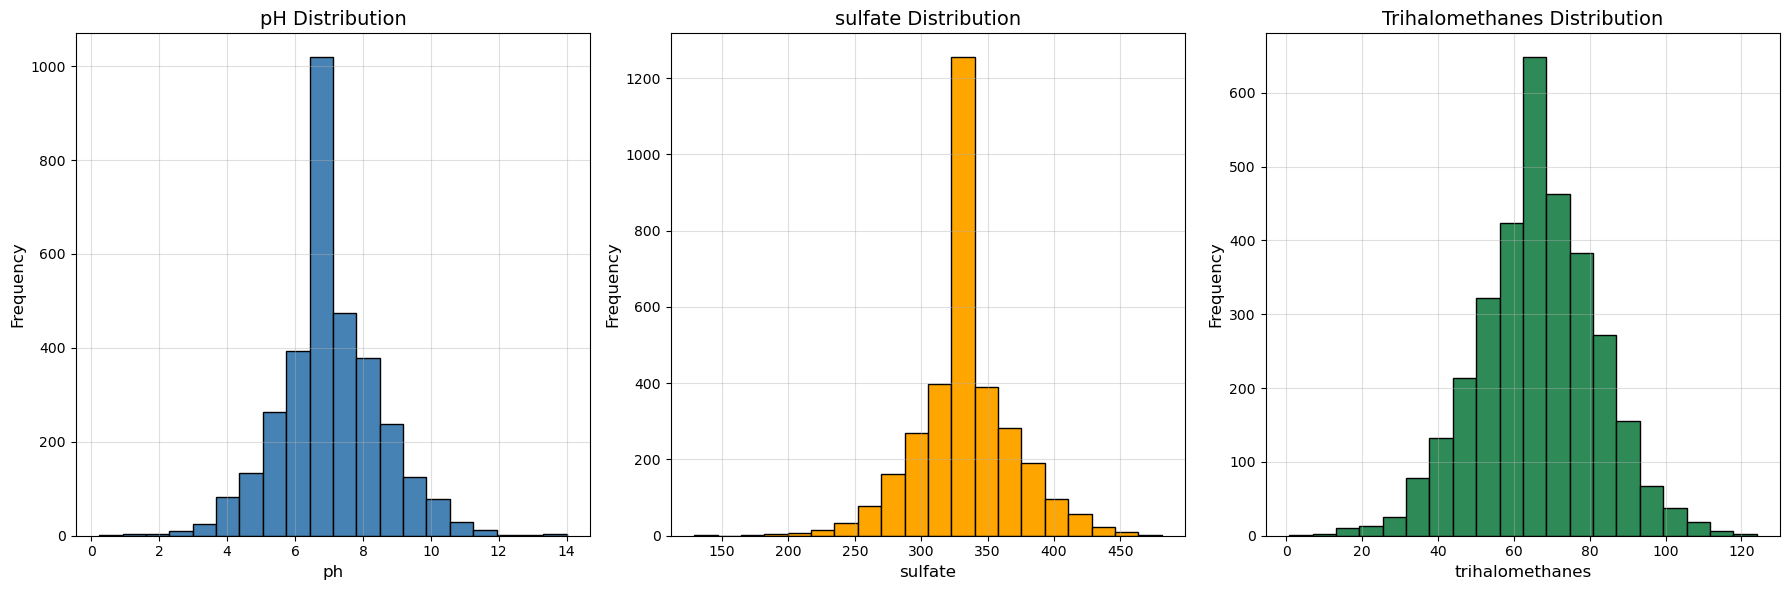

In [105]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

columns = ["ph", "sulfate", "trihalomethanes"]
titles = ["pH Distribution", "sulfate Distribution", "Trihalomethanes Distribution"]
colors = ["steelblue", "orange", "seagreen"]

for ax, col, title, color in zip(axes, columns, titles, colors):
    ax.hist(df[col].dropna(), bins=20, color=color, edgecolor="black")
    ax.set_title(title, fontsize=14)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel("Frequency", fontsize=12)
    ax.grid(True, alpha=0.4)

plt.tight_layout()
plt.savefig("images/water_properties.png", dpi=300, bbox_inches='tight')
plt.show()


In [60]:
df.isna().sum().sort_values(ascending=False)

ph                 0
hardness           0
solids             0
chloramines        0
sulfate            0
conductivity       0
organic_carbon     0
trihalomethanes    0
turbidity          0
potability         0
dtype: int64

In [61]:
# 4.4 Outlier detection

# Using IQR 

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))]

In [64]:
outlier_mask = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
rows_with_outliers = df[outlier_mask.any(axis=1)]


In [68]:
# Number of Outliers
outlier_mask.sum()

ph                 142
hardness            83
solids              47
chloramines         61
sulfate            264
conductivity        11
organic_carbon      25
trihalomethanes     54
turbidity           19
potability           0
dtype: int64

In [79]:
# 4.5 Remove or fix invalid values

# Negative values
(df < 0).sum()

ph                 0
hardness           0
solids             0
chloramines        0
sulfate            0
conductivity       0
organic_carbon     0
trihalomethanes    0
turbidity          0
potability         0
dtype: int64

In [100]:
# Dictionary of validation rules per column
rules = {
    "ph": {
        "min": 0,
        "max": 14,
        "zero_invalid": True
    },
    "turbidity": {
        "min": 0,
        "max": 500
    },
    "solids": {
        "min": 0,
        "max": 50000
    },
    "conductivity": {
        "min": 0,
        "max": 20000
    },
    "sulfate": {
        "min": 0,
        "max": 2500,
        "zero_invalid": True
    },
    "trihalomethanes": {
        "min": 0,
        "max": 400
    },
    "chloramines": {
        "min": 0,
        "zero_invalid": True
    },
}


In [101]:
# Keep a copy for comparison
df_original = df.copy()

# Loop through all columns that have rules
for col, cond in rules.items():
    
    # 1. Replace negative values
    df.loc[df[col] < 0, col] = np.nan
    
    # 2. Replace values above the max
    if "max" in cond:
        df.loc[df[col] > cond["max"], col] = np.nan

    # 3. Replace values below the minimum
    if "min" in cond:
        df.loc[df[col] < cond["min"], col] = np.nan

    # 4. If zero is not valid, replace zeros with NaN
    if cond.get("zero_invalid", False):
        df.loc[df[col] == 0, col] = np.nan


In [83]:
df["invalid_flag"] = df.isna().any(axis=1)


In [84]:
df["invalid_flag"].value_counts()


invalid_flag
False    3262
True       14
Name: count, dtype: int64

In [85]:
df_original["ph"].describe(), df["ph"].describe()


(count    3276.000000
 mean        7.074194
 std         1.470040
 min         0.000000
 25%         6.277673
 50%         7.036752
 75%         7.870050
 max        14.000000
 Name: ph, dtype: float64,
 count    3275.000000
 mean        7.076354
 std         1.465056
 min         0.227499
 25%         6.278792
 50%         7.036752
 75%         7.870318
 max        14.000000
 Name: ph, dtype: float64)

In [86]:
df

,ph,hardness,solids,chloramines,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity,potability,invalid_flag
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0,False
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0,False
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0,False
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0,False
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0,False
...,...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1,False
3272,7.808856,193.553212,17329.802160,8.061362,333.073546,392.449580,19.903225,66.622485,2.798243,1,False
3273,9.419510,175.762646,33155.578218,7.350233,333.073546,432.044783,11.039070,69.845400,3.298875,1,False
3274,5.126763,230.603758,11983.869376,6.303357,333.073546,402.883113,11.168946,77.488213,4.708658,1,False


In [87]:
# 5. Post-Cleaning Summary

df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3275 non-null   float64
 1   hardness         3276 non-null   float64
 2   solids           3263 non-null   float64
 3   chloramines      3276 non-null   float64
 4   sulfate          3276 non-null   float64
 5   conductivity     3276 non-null   float64
 6   organic_carbon   3276 non-null   float64
 7   trihalomethanes  3276 non-null   float64
 8   turbidity        3276 non-null   float64
 9   potability       3276 non-null   int64  
 10  invalid_flag     3276 non-null   bool   
dtypes: bool(1), float64(9), int64(1)
memory usage: 259.3 KB


In [88]:
df.isna().sum()

ph                  1
hardness            0
solids             13
chloramines         0
sulfate             0
conductivity        0
organic_carbon      0
trihalomethanes     0
turbidity           0
potability          0
invalid_flag        0
dtype: int64

In [90]:
# Imputing Null values using the median
df.fillna({
    "ph": df["ph"].median(),
    "solids": df["solids"].median(),
}, inplace=True)


In [91]:
df.isna().sum()

ph                 0
hardness           0
solids             0
chloramines        0
sulfate            0
conductivity       0
organic_carbon     0
trihalomethanes    0
turbidity          0
potability         0
invalid_flag       0
dtype: int64

In [92]:
# 6. Save Cleaned Dataset
df.to_csv("cleaned_water_potability.csv", index=False)

# 7. Exploratory Analysis 

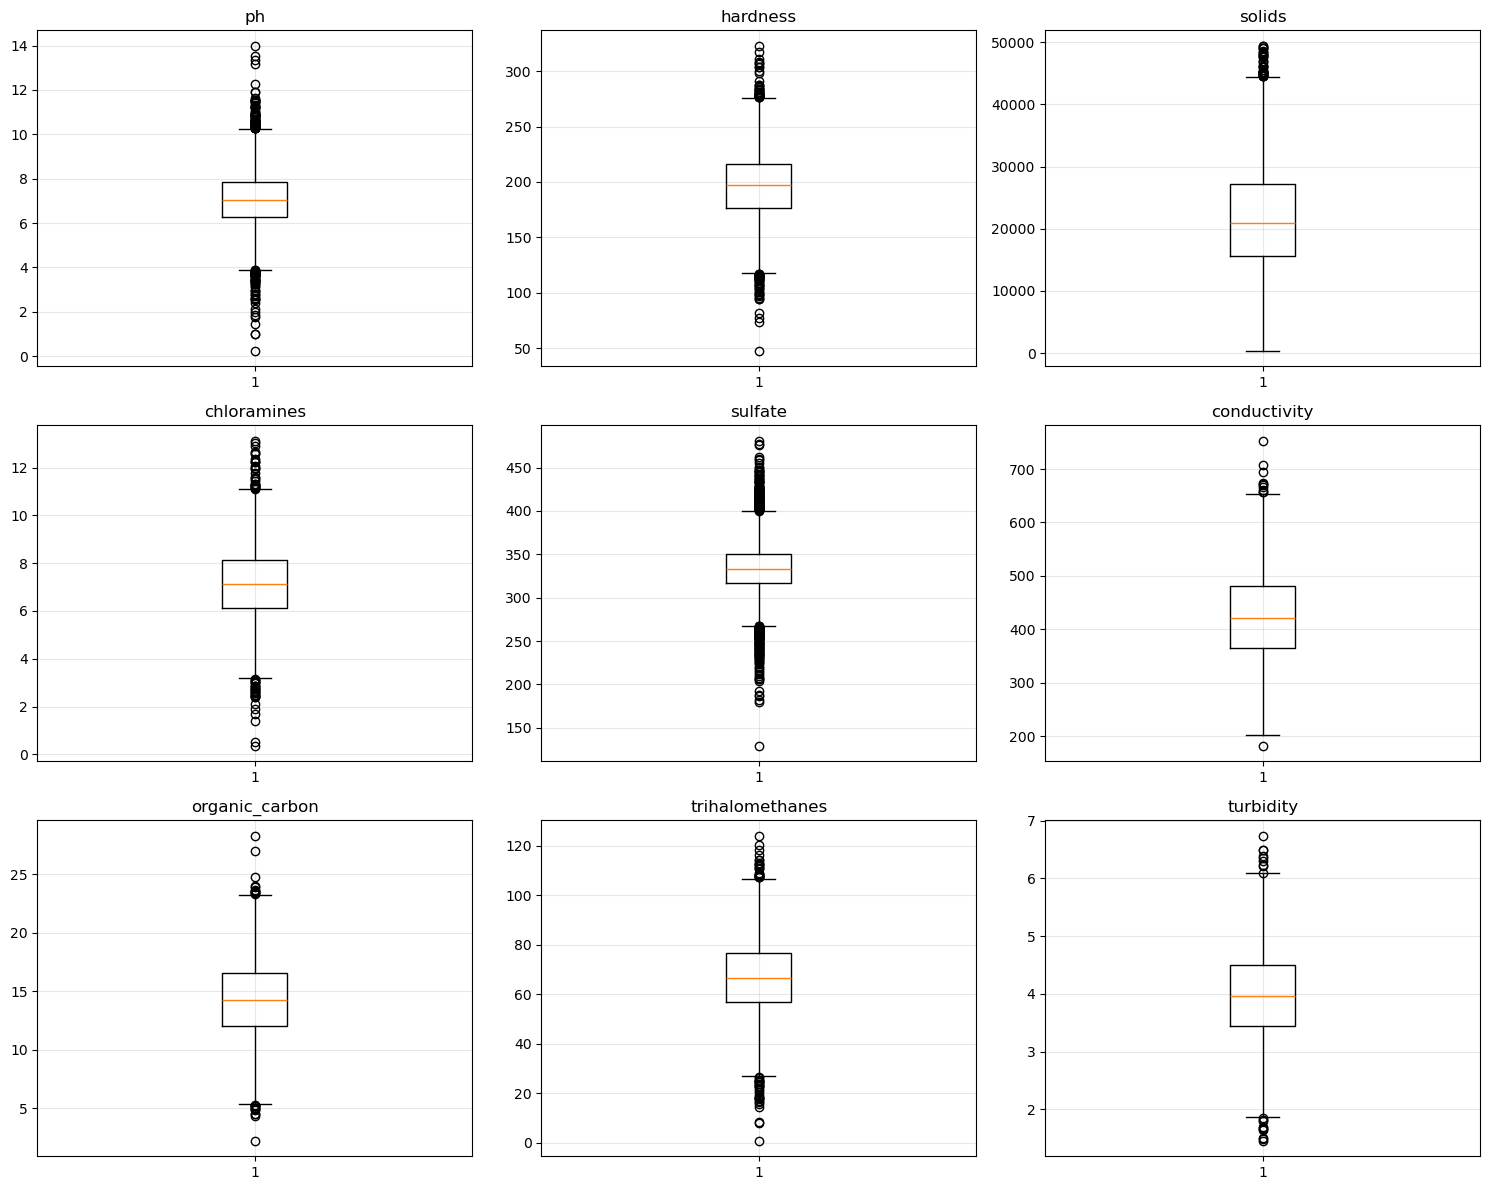

In [102]:
numeric_cols = ["ph", "hardness", "solids", "chloramines",
                "sulfate", "conductivity", "organic_carbon",
                "trihalomethanes", "turbidity"]

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for ax, col in zip(axes, numeric_cols):
    ax.boxplot(df[col].dropna())
    ax.set_title(col)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig("images/boxplot_properties.png", dpi=300, bbox_inches='tight')
plt.show()


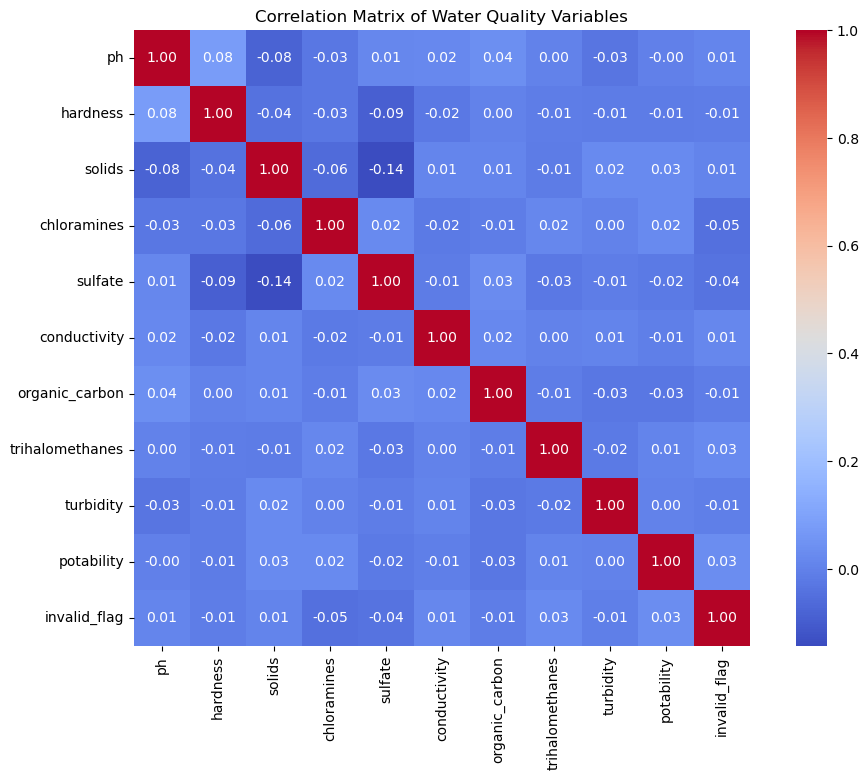

In [103]:
import seaborn as sns
plt.figure(figsize=(12, 8))
corr = df.corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Matrix of Water Quality Variables")
plt.savefig("images/heatmap_properties.png", dpi=300, bbox_inches='tight')
plt.show()

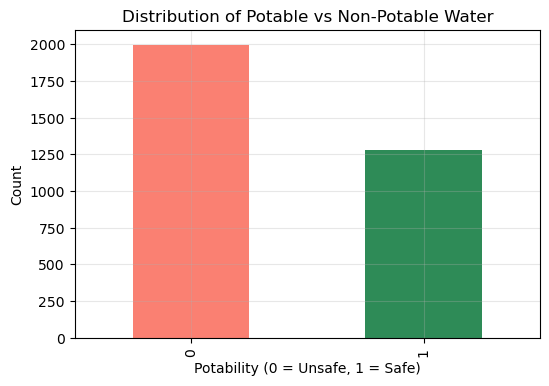

In [106]:
# Bar Plot of Potability Counts
plt.figure(figsize=(6, 4))
df["potability"].value_counts().plot(kind="bar", color=["salmon", "seagreen"])
plt.title("Distribution of Potable vs Non-Potable Water")
plt.xlabel("Potability (0 = Unsafe, 1 = Safe)")
plt.ylabel("Count")
plt.grid(True, alpha=0.3)
plt.savefig("images/potable_distribution.png", dpi=300, bbox_inches='tight')
plt.show()


# 8. Conclusion
### ✔ Task 1 — Inspected & documented raw dataset

+ Checked shape

+ Checked missing values

+ Checked duplicates

+ Checked extremes

### ✔ Task 2 — Cleaned columns

+ Standardized column names

+ Fixed formatting

+ dtypes were in the correct format

### ✔ Task 3 — Handled missing values

+ chose a Deciding strategy is skewness 

+ Applied imputation

### ✔ Task 4 — Detected outliers

+ Used IQR method


### ✔ Task 5 — Remove duplicates

+ No duplicates we present in the dataset


### ✔ Task 6 — Validated the cleaned dataset
### ✔ Task 7 — Save cleaned dataset


# Cleaning Mini report
### Executive Summary
+ This project uses the **Water Potability Dataset** from obtained from kaggle, **Kadiwal, Aditya. (2020). Water Potability Dataset.** available at: < https://www.kaggle.com/datasets/adityakadiwal/water-potability>
+ The data had 3276 entries with 10 columns namel; pH, chloramines, sulfate, conductivity, organic_carbon, trohalomethanes, turbidity and potability
+ The main aim of this project was to clean the dataset and determine the potability of the water. 
### Cleaning Insights
+ The dataset had no duplicate vales
+ pH, sulfate and trihalomethanes had missing values, based on domain knowledge these were imputed using the median value. 
+ All the columns had the appropriate dtypes
+ Once the missing values were impouted, we used the IQR method to detect any outliers, the sufate had the highest number of outliers
+ The presence of negative values was tested and non were found in the dataset
+ pH and solids had invalid numbers based on the rules pH>14 and solids > 50000, it was noted that only 1 sample had an invalid number under pH while solids had 13
+ These were then replaced with NaN values and later we imputed the median values for these missing values
+ Once these were done, we did a little EDA, were we plotted the boxplots for all properties, and the data corelated to the outliers already calculated. 
+ A heatmap was plotted to show corelations between variables and a bar chart was plotted to show potable and non potable water samples. 
+ according to this dataset, most water is not safe for human consumption as the non potable samples were higher than the potable with a margin of approximately 750 difference. 